In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matpl

In [3]:
probs = [0.20, 0.40, 0.10, 0.20, 0.05, 0.05]
labels = [('0–17', 'Male'), ('0–17', 'Female'), 
          ('18–64', 'Male'), ('18–64', 'Female'),
          ('65+', 'Male'), ('65+', 'Female')]
rng = np.random.default_rng(seed=42)
N=1000
indices = rng.choice(len(probs), size=N, p=probs)

individuals = [labels[i] for i in indices]

# Sampled synthetic population
synthetic = pd.DataFrame(individuals, columns=['Age Group', 'Sex'])

# Compare age marginals
age_counts = synthetic['Age Group'].value_counts(normalize=True)
sex_counts = synthetic['Sex'].value_counts(normalize=True)

print("Synthetic Age Distribution:")
print(age_counts)

print("\nSynthetic Sex Distribution:")
print(sex_counts)



Synthetic Age Distribution:
Age Group
0–17     0.603
18–64    0.299
65+      0.098
Name: proportion, dtype: float64

Synthetic Sex Distribution:
Sex
Female    0.641
Male      0.359
Name: proportion, dtype: float64


In [4]:
age = [60,30,10] #row
sex = [40,60] #column

# Sum of rows, and sum of columns should be identical, i.e. 100
# Assuming age (1st entered vector as row), and sex as column

seed = rng.integers(low=1, high=10,size=(len(age),len(sex)))

### Iteration one,, row adjustment, column adjustment, check frobenious norm
seed = np.full((3,2),10)
seed


array([[10, 10],
       [10, 10],
       [10, 10]])

In [5]:
# Row scaling
n_row = len(age)
n_col = len(sex)
sf = age/seed.sum(axis=1) 
scaled_matrix = (seed.T * sf).T
scaled_matrix


array([[30., 30.],
       [15., 15.],
       [ 5.,  5.]])

In [6]:
seed.T * sf

array([[30., 15.,  5.],
       [30., 15.,  5.]])

In [7]:
# Apply scaling to each row (scale across columns)
scaled_matrix = (seed.T * sf).T

print(scaled_matrix)
print("New row sums:", scaled_matrix.sum(axis=1))

[[30. 30.]
 [15. 15.]
 [ 5.  5.]]
New row sums: [60. 30. 10.]


In [8]:
# np.abs(np.sum(scaled_matrix.sum(axis=1)) - age)
np.sum(scaled_matrix.sum(axis=1)) - np.sum(age)


np.float64(0.0)

In [9]:
int(np.average([np.average(age),np.average(sex)]) * 1.5)

62

In [10]:
def seed_gen(age,sex):
    n_row = len(age)
    n_col = len(sex)
    avg = np.average([np.average(age),np.average(sex)])
    low_val = int(avg * 0.5)
    high_val = int(avg * 1.5)
    seed = rng.integers(low=low_val,high=high_val,size=(len(age),len(sex)))
    return seed
seed = seed_gen([60,30,10],[40,60])
seed

array([[38, 26],
       [53, 46],
       [40, 36]])

In [11]:
sf = sex/seed.sum(axis=0) 
scaled_matrix = (seed * sf.T)
scaled_matrix


array([[11.60305344, 14.44444444],
       [16.18320611, 25.55555556],
       [12.21374046, 20.        ]])

In [12]:
seed = np.full( (3,2), 10)
seed, age, sex

(array([[10, 10],
        [10, 10],
        [10, 10]]),
 [60, 30, 10],
 [40, 60])

In [13]:
def row_adjust(seed,age):   
    sf = age/seed.sum(axis=1) 
    row_scaled_matrix = (seed.T * sf).T
    return row_scaled_matrix
def column_adgust(seed,sex):
    sf = sex/seed.sum(axis=0) 
    col_scaled_matrix = (seed * sf.T)
    return col_scaled_matrix
xx = column_adgust(row_adjust(seed,age), sex)
xx


array([[24., 36.],
       [12., 18.],
       [ 4.,  6.]])

In [14]:
xx.sum(axis=0).sum()



np.float64(100.0)

In [15]:
def addition(a,b) -> int:
    return int(a) + int(b)
addition(3.5,2)

5

In [16]:
# class ipf: # Class iterative proportional fitting: 
#     def __init__(self,age,sex, tol=1e-5, max_iter=1000):
#         # self.mat_seed = mat_seed
#         self.age = np.array(age)
#         self.sex = np.array(sex)


#     def seed_gen(self):
#         n_row = len(self.age)
#         n_col = len(self.sex)
#         avg = np.average([np.average(self.age),np.average(self.sex)])
#         low_val = int(avg * 0.5)
#         high_val = int(avg * 1.5)
#         mat_seed = rng.integers(low=low_val,high=high_val,size=(len(self.age),len(self.sex)))
#         return self.mat_seed
    

#     def row_adjust(self):   
#         sf = self.age/self.mat_seed.sum(axis=1) 
#         row_scaled_matrix = (self.mat_seed.T * sf).T
#         return row_scaled_matrix
    

#     def column_adgust(self):
#         sf = self.sex/self.mat_seed.sum(axis=0) 
#         col_scaled_matrix = (self.mat_seed * sf.T)
#         return col_scaled_matrix
            

#     def fit(self):
#         # matrix = self.mat_seed.copy()
#         matrix = seed_gen()
#         for _ in range(self.max_iter):
#             prev_mat = matrix.copy()
#             next_mat = row_adjust(matrix)
#             next_mat = row_adjust(next_mat)
#             if np.linalg.norm(prev_mat - next_mat, ord='fro') <= self.tol:
#                 break
#         self.fitted_matrix = next_mat
#         return next_mat
    
#     # def generate(self, n_samples = 1000,random_state=42):

    


In [19]:
age_marginals = {'0-18':60,'19-64':30,'64+':10}
sex_marginals = {'m':40,'f':60}
# age.values()

In [20]:
import numpy as np


class IPF: 
    def __init__(self, age_dict, sex_dict, tol=1e-5, max_iter=1000):
        # Store marginal distributions and label mappings
        self.age_keys = list(age_dict.keys())
        self.sex_keys = list(sex_dict.keys())
        self.age = np.array(list(age_dict.values()))
        self.sex = np.array(list(sex_dict.values()))
        
        self.tol = tol
        self.max_iter = max_iter
        self.mat_seed = None
        self.fitted_matrix = None
        self.rng = np.random.default_rng(seed=42)

    def seed_gen(self): # Seed matrix generation method
        n_row = len(self.age)
        n_col = len(self.sex)
        avg = np.average([np.average(self.age), np.average(self.sex)])
        low_val = int(avg * 0.5)
        high_val = int(avg * 1.5)
        self.mat_seed = self.rng.integers(low=low_val, high=high_val, size=(n_row, n_col))
        return self.mat_seed

    def row_adjust(self, matrix): # Adjust and scale rows
        sf = self.age / matrix.sum(axis=1)
        return (matrix.T * sf).T

    def column_adjust(self, matrix):  # Adjust and scale columns
        sf = self.sex / matrix.sum(axis=0)
        return matrix * sf

    def fit(self): # Fit function to generate final matrix structure
        matrix = self.seed_gen().astype(float)
        for _ in range(self.max_iter):
            prev = matrix.copy()
            matrix = self.row_adjust(matrix)
            matrix = self.column_adjust(matrix)
            if np.linalg.norm(matrix - prev, ord='fro') < self.tol: # Limit convergence using Frobenious norm
                print(f"Matrix converged on {_} iterations")
                break
        self.fitted_matrix = matrix
        return matrix

    def generate(self, n_samples=1000, random_state=42): # Genetate ynthetic population
        if self.fitted_matrix is None:
            raise ValueError("You must call .fit() before generating samples.")
        
        prob_matrix = self.fitted_matrix / self.fitted_matrix.sum() # Change matrix to probability matrix
        flattened_probs = prob_matrix.flatten() # Flatten matrix

        # Map index positions to actual labels
        joint_labels = [(self.age_keys[i], self.sex_keys[j])
                        for i in range(prob_matrix.shape[0])
                        for j in range(prob_matrix.shape[1])] # Combination of age,sex fewatures 

        rng = np.random.default_rng(seed=random_state)
        indices = rng.choice(len(joint_labels), size=n_samples, p=flattened_probs) # Generate synthetioc data stratified 
        samples = [joint_labels[i] for i in indices]

        samp_array = np.array(samples, dtype=str)

        # Generate synthetic age based on age group
        samp_array = np.array(samples, dtype=str)

        synthetic_ages = []
        for row in samp_array:
            age_group = row[0].strip().replace('–', '-').replace('—', '-')  # Normalize
            if age_group == '18-64':
                synthetic_ages.append(np.random.randint(18, 65))
            elif age_group == '0-17':
                synthetic_ages.append(np.random.randint(0, 18))
            else:
                synthetic_ages.append(np.random.randint(65, 100))

        synthetic_ages = np.array(synthetic_ages).reshape(-1, 1)
        result = np.hstack([samp_array, synthetic_ages])

        # print(result)
        return result


In [21]:
# samples.head()
samples[2][0]

NameError: name 'samples' is not defined

In [28]:
age = {'0–17': 60, '18–64': 30, '65+': 10}
sex = {'Male': 40, 'Female': 60}

ipf_model = IPF(age, sex)
fitted_matrix = ipf_model.fit()

print("Fitted Matrix (Rounded):")
print(np.round(fitted_matrix, 2))

# Sample synthetic individuals
samples = ipf_model.generate(n_samples=1000)
# print("\nSampled Individuals (Age, Sex):")
# for s in samples:
#     print(s)


Matrix converged on 5 iterations
Fitted Matrix (Rounded):
[[18.95 41.05]
 [16.9  13.1 ]
 [ 4.15  5.85]]


In [37]:
samples

array([['18–64', 'Female', '21'],
       ['0–17', 'Female', '0'],
       ['18–64', 'Female', '39'],
       ...,
       ['0–17', 'Male', '0'],
       ['65+', 'Female', '70'],
       ['0–17', 'Female', '12']], shape=(1000, 3), dtype='<U21')

In [38]:
pd.DataFrame(samples)

,0,1,2
0,18–64,Female,21
1,0–17,Female,0
2,18–64,Female,39
3,18–64,Male,60
4,0–17,Male,17
...,...,...,...
995,0–17,Female,16
996,18–64,Male,30
997,0–17,Male,0
998,65+,Female,70


In [42]:
import pandas as pd
from collections import Counter

# Assuming samples is a list of tuples like: [('0–17', 'Female'), ...]

df = pd.DataFrame(samples, columns=["Age_group", "Sex", "age"])

# Get observed marginals
observed_age = df["Age_group"].value_counts(normalize=True).sort_index()
observed_sex = df["Sex"].value_counts(normalize=True).sort_index()

order = ['Male', 'Female']
observed_sex = observed_sex.reindex(order)


# Convert input marginals to distributions
total = sum(age.values())
target_age = pd.Series(age) / total
target_sex = pd.Series(sex) / total

observed_age, target_age, target_sex,observed_sex

(Age_group
 0–17     0.603
 18–64    0.299
 65+      0.098
 Name: proportion, dtype: float64,
 0–17     0.6
 18–64    0.3
 65+      0.1
 dtype: float64,
 Male      0.4
 Female    0.6
 dtype: float64,
 Sex
 Male      0.41
 Female    0.59
 Name: proportion, dtype: float64)

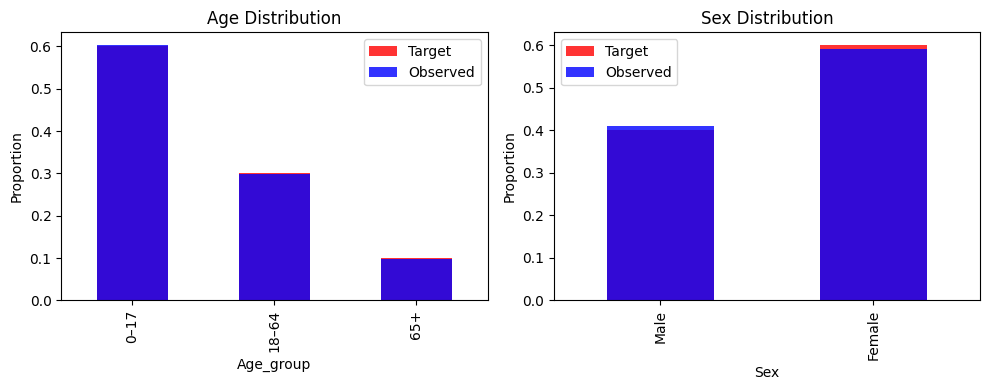

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_dist(target_age, target_sex, observed_age, observed_sex): 
    # Age comparison
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    target_age.plot(kind='bar', alpha=0.8, label='Target',color='red')
    observed_age.plot(kind='bar', alpha=0.8, label='Observed', color='blue')
    plt.title("Age Distribution")
    plt.ylabel("Proportion")
    plt.legend()

    # Sex comparison
    plt.subplot(1, 2, 2)
    target_sex.plot(kind='bar', alpha=0.8, label='Target', color = 'red')
    observed_sex.plot(kind='bar', alpha=0.8, label='Observed', color='blue')
    plt.title("Sex Distribution")
    plt.ylabel("Proportion")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_dist(target_age, target_sex, observed_age, observed_sex)

In [44]:
from scipy.stats import entropy
def kl_div(target_age, target_sex, observed_age, observed_sex):
# KL divergence (target || observed)
    kl_age = entropy(target_age.sort_index(), observed_age.sort_index())
    kl_sex = entropy(target_sex.sort_index(), observed_sex.sort_index())


    print(f"KL divergence (age): {kl_age:.4f}")
    print(f"KL divergence (sex): {kl_sex:.4f}")

    if (kl_age > 0.1) & (kl_sex > 0.1):
        print(f"Poor match")
    else:
        print(f"Good match")
    # return kl_age, kl_sex
kl_div(target_age, target_sex, observed_age, observed_sex)


KL divergence (age): 0.0000
KL divergence (sex): 0.0002
Good match


In [45]:

from scipy.stats import entropy, chisquare
def chi_square_test(observed_counts, expected_counts):
    result = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    return result.pvalue
chi_square_test(observed_age, target_age)

np.float64(0.9999708337586765)

### MonteCarlo Simulation


In [46]:
age,sex

({'0–17': 60, '18–64': 30, '65+': 10}, {'Male': 40, 'Female': 60})

In [48]:
n_samples = 1000
# np.array(age.values())/np.sum(np.array(age.values()))
# Convert values to integers
aa = np.array(list(age.values()))
prob_age = aa/aa.sum()
bb = np.array(list(sex.values()))
# int(age.values())
prob_sex = bb/bb.sum()
prob_age, prob_sex
# age, sex

(array([0.6, 0.3, 0.1]), array([0.4, 0.6]))

In [56]:
sampled_age_groups = np.random.choice(list(age.keys()), size=n_samples, p=prob_age)
sampled_sexes = np.random.choice(list(sex.keys()), size=n_samples, p=prob_sex)


##### We can now radomly generate age based on agegroups

In [ ]:
sampled_ages = []
for row in sampled_age_groups:
    age_group = row[0].strip().replace('–', '-').replace('—', '-')  # Normalize
    if age_group == '18-64':
        sampled_ages.append(np.random.randint(18, 65))
    elif age_group == '0-17':
        sampled_ages.append(np.random.randint(0, 18))
    else:
        sampled_ages.append(np.random.randint(65, 100))
# sampled_ages

[26,
 4,
 13,
 75,
 0,
 17,
 43,
 12,
 4,
 87,
 62,
 52,
 12,
 55,
 74,
 98,
 93,
 1,
 16,
 14,
 10,
 1,
 6,
 89,
 63,
 8,
 40,
 7,
 14,
 28,
 61,
 7,
 75,
 11,
 0,
 39,
 11,
 68,
 58,
 11,
 16,
 0,
 4,
 26,
 12,
 8,
 6,
 42,
 8,
 6,
 19,
 16,
 4,
 16,
 3,
 7,
 50,
 1,
 6,
 0,
 8,
 6,
 9,
 10,
 10,
 5,
 28,
 34,
 46,
 9,
 66,
 13,
 9,
 6,
 17,
 37,
 6,
 13,
 29,
 60,
 24,
 63,
 16,
 10,
 16,
 14,
 15,
 29,
 11,
 32,
 35,
 51,
 2,
 12,
 28,
 45,
 1,
 17,
 56,
 62,
 40,
 95,
 25,
 11,
 44,
 41,
 10,
 8,
 7,
 87,
 83,
 3,
 11,
 17,
 8,
 47,
 14,
 7,
 64,
 2,
 11,
 11,
 7,
 33,
 57,
 10,
 8,
 45,
 15,
 16,
 1,
 21,
 62,
 17,
 10,
 14,
 9,
 2,
 41,
 9,
 3,
 31,
 16,
 76,
 10,
 31,
 63,
 56,
 22,
 92,
 28,
 23,
 13,
 20,
 0,
 10,
 33,
 15,
 12,
 17,
 9,
 40,
 22,
 12,
 15,
 6,
 5,
 4,
 39,
 10,
 52,
 14,
 13,
 94,
 9,
 6,
 6,
 2,
 2,
 8,
 33,
 4,
 5,
 6,
 9,
 0,
 12,
 44,
 15,
 15,
 49,
 68,
 17,
 35,
 11,
 34,
 14,
 9,
 5,
 12,
 17,
 13,
 7,
 56,
 1,
 53,
 14,
 14,
 3,
 7,
 31,
 3,
 17,
 9,

In [72]:
sampled_age_groups = np.array(sampled_age_groups).reshape(-1, 1)
sampled_ages = np.array(sampled_ages).reshape(-1, 1)
sampled_sexes = np.array(sampled_sexes).reshape(-1, 1)


result = np.hstack([sampled_age_groups, sampled_ages])
final = np.hstack([result, sampled_sexes])
final


array([['18–64', '26', 'Female'],
       ['0–17', '4', 'Female'],
       ['0–17', '13', 'Female'],
       ...,
       ['0–17', '7', 'Female'],
       ['18–64', '23', 'Female'],
       ['0–17', '11', 'Male']], shape=(1000, 3), dtype='<U21')

In [73]:
df_mc = pd.DataFrame(final, columns=['age_group', 'age', 'Sex'])
df_mc.head()

,age_group,age,Sex
0,18–64,26,Female
1,0–17,4,Female
2,0–17,13,Female
3,65+,75,Female
4,0–17,0,Female


##### Modularity

In [ ]:
# class mc_generator:
#     def __init__(self, age,sex):
#         self.age = age
#         self.sex = sex

#     def find_probs(self):

#         # Convert values to integers
#         aa = np.array(list(self.age.values()))
#         prob_age = aa/aa.sum()
#         bb = np.array(list(self.sex.values()))
#         # int(age.values())
#         prob_sex = bb/bb.sum()
#         return prob_age, prob_sex
    

#     def generate_samples(self, n_samples):
#         prob_age, prob_sex = self.find_probs()
#         sampled_age_groups = np.random.choice(list(self.age.keys()), size=n_samples, p=prob_age)
#         sampled_sexes = np.random.choice(list(self.sex.keys()), size=n_samples, p=prob_sex)
#         sampled_ages = []
#         for row in sampled_age_groups:
#             age_group = row[0].strip().replace('–', '-').replace('—', '-')  # Normalize
#             if age_group == '18-64':
#                 sampled_ages.append(np.random.randint(18, 65))
#             elif age_group == '0-17':
#                 sampled_ages.append(np.random.randint(0, 18))
#             else:
#                 sampled_ages.append(np.random.randint(65, 100))

#         sampled_age_groups = np.array(sampled_age_groups).reshape(-1, 1)
#         sampled_ages = np.array(sampled_ages).reshape(-1, 1)
#         sampled_sexes = np.array(sampled_sexes).reshape(-1, 1)


#         result = np.hstack([sampled_age_groups, sampled_ages])
#         final = np.hstack([result, sampled_sexes])

#         return final
        

    

In [74]:
import numpy as np

class mc_generator:
    def __init__(self, age, sex):
        """
        age: dict like {'0-17': count, '18-64': count, '65+': count}
        sex: dict like {'M': count, 'F': count}
        """
        self.age = age
        self.sex = sex

    def find_probs(self):
        # Normalize age and sex counts to get probabilities
        aa = np.array(list(self.age.values()), dtype=float)
        prob_age = aa / aa.sum()

        bb = np.array(list(self.sex.values()), dtype=float)
        prob_sex = bb / bb.sum()

        return prob_age, prob_sex

    def generate_samples(self, n_samples):
        prob_age, prob_sex = self.find_probs()

        # Sample age groups and sexes
        sampled_age_groups = np.random.choice(
            list(self.age.keys()), size=n_samples, p=prob_age)
        sampled_sexes = np.random.choice(
            list(self.sex.keys()), size=n_samples, p=prob_sex)

        # Convert age group to a specific age
        sampled_ages = []
        for age_group in sampled_age_groups:
            age_group = age_group.strip().replace('–', '-').replace('—', '-')
            if age_group == '18-64':
                sampled_ages.append(np.random.randint(18, 65))
            elif age_group == '0-17':
                sampled_ages.append(np.random.randint(0, 18))
            else:  # '65+'
                sampled_ages.append(np.random.randint(65, 100))

        # Stack into final array
        sampled_age_groups = np.array(sampled_age_groups).reshape(-1, 1)
        sampled_ages = np.array(sampled_ages).reshape(-1, 1)
        sampled_sexes = np.array(sampled_sexes).reshape(-1, 1)

        result = np.hstack([sampled_age_groups, sampled_ages, sampled_sexes])
        return result


In [75]:
age_dist = {'0-17': 2500, '18-64': 6000, '65+': 1500}
sex_dist = {'M': 4800, 'F': 5200}

gen = mc_generator(age=age_dist, sex=sex_dist)
synthetic_data = gen.generate_samples(n_samples=10)

print(synthetic_data)


[['18-64' '50' 'F']
 ['18-64' '51' 'M']
 ['18-64' '35' 'M']
 ['18-64' '60' 'F']
 ['18-64' '62' 'F']
 ['18-64' '57' 'F']
 ['18-64' '18' 'F']
 ['0-17' '5' 'F']
 ['18-64' '55' 'F']
 ['18-64' '23' 'F']]
